YOUTUBE TRENDING VIDEO ANALYSIS & MACHINE LEARNING MODEL

IMPORT LIBRARIES

In [2]:
# ------------------ IMPORTS ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# NLTK setup
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#LOAD DATASET

df = pd.read_csv("USvideos.csv")

# Load category JSON file (Download from same dataset page)
with open("US_category_id.json") as f:
    data = json.load(f)

categories = {int(item['id']): item['snippet']['title'] for item in data['items']}
df['category_name'] = df['category_id'].map(categories)

df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


TASK1: EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
# 1. DATASET OVERVIEW


print("\nDataset Shape:", df.shape)
print("\nDataset Info:\n")
print(df.info())
df.describe(include="all")




Dataset Shape: (40949, 17)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_erro

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
count,40949,40949,40949,40949,40949.000000,40949,40949,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949,40949,40949,40949,40379,40949
unique,6351,205,6455,2207,NaN,6269,6055,NaN,NaN,NaN,NaN,6352,2,2,2,6901,16
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,NaN,2018-05-18T14:00:04.000Z,[none],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...,Entertainment
freq,30,200,30,203,NaN,50,1535,NaN,NaN,NaN,NaN,30,40316,40780,40926,58,9964
mean,NaN,NaN,NaN,NaN,19.972429,NaN,NaN,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.568327,NaN,NaN,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,NaN,NaN,NaN,NaN,NaN,NaN


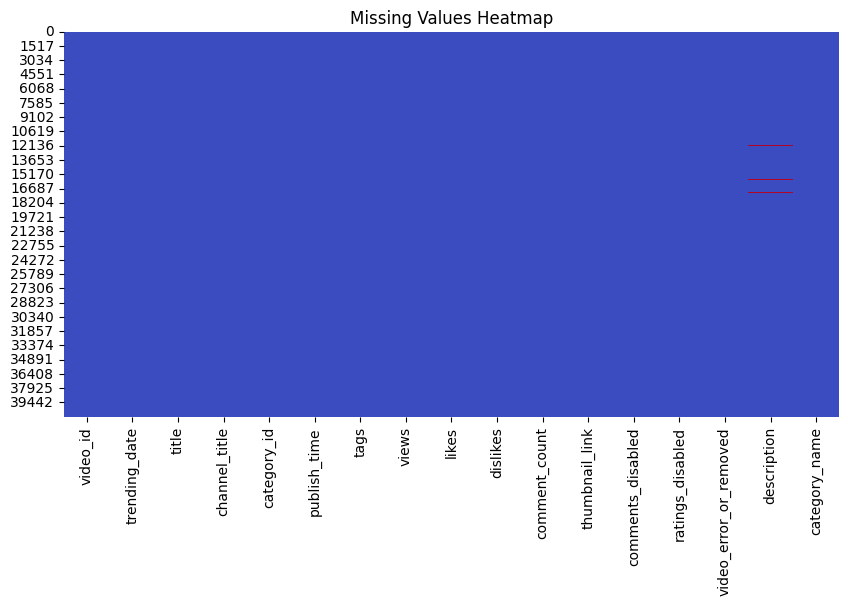

In [5]:
#2. MISSING VALUE ANALYSIS


plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()


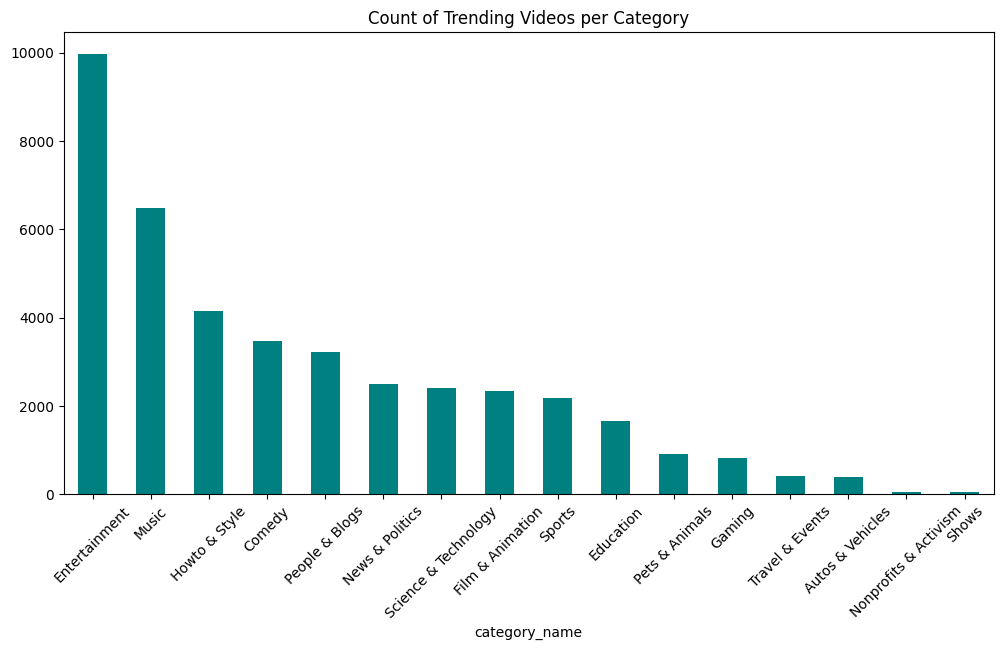

In [6]:
#3. MOST TRENDING CATEGORY

plt.figure(figsize=(12,6))
df['category_name'].value_counts().plot(kind='bar', color='teal')
plt.title("Count of Trending Videos per Category")
plt.xticks(rotation=45)
plt.show()


C:\Users\shaba\AppData\Local\Temp\ipykernel_14708\359313171.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df["trending_date"] = pd.to_datetime(df["trending_date"], format='%y.%d.%m', errors='ignore')


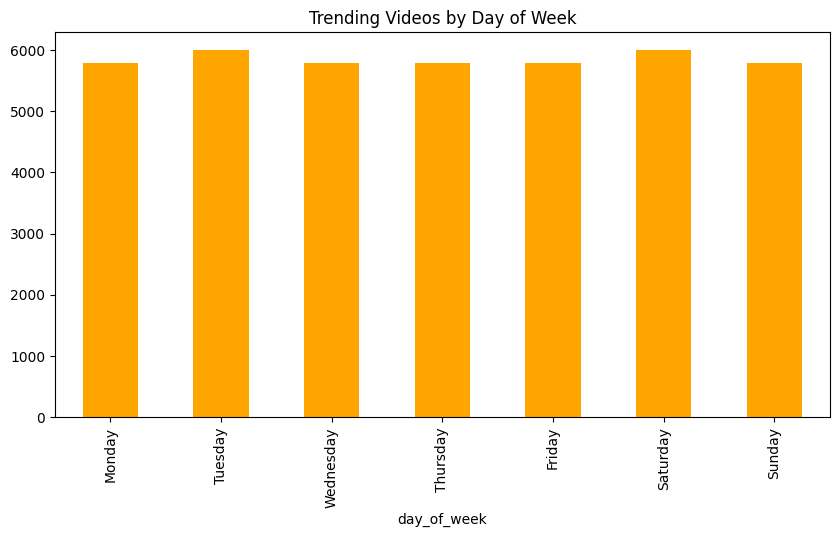

In [ ]:
# 4. TRENDING VIDEOS BY DAY OF WEEK

df["trending_date"] = pd.to_datetime(df["trending_date"], format='%y.%d.%m', errors='ignore')
df["day_of_week"] = df["trending_date"].dt.day_name()

# ⭐ Added correct weekday order
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,5))

# ⭐ Reindex the counts according to the order
df["day_of_week"].value_counts().reindex(order).plot(kind="bar", color="orange")

plt.title("Trending Videos by Day of Week")
plt.show()


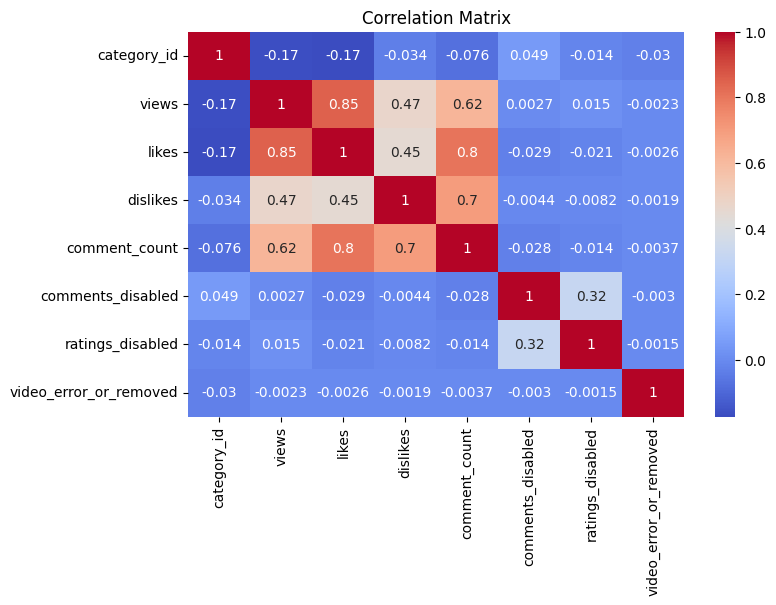

In [10]:
#5. CORRELATION HEATMAP

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


TASK2: VISUALIZATION

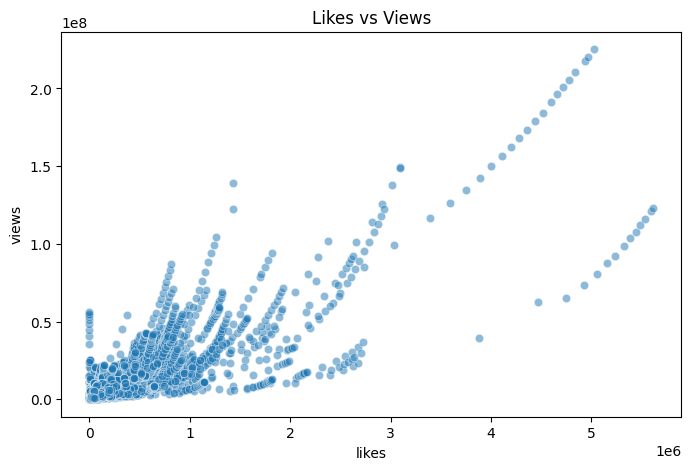

In [11]:
#SCATTER PLOT: LIKES VS VIEWS

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['likes'], y=df['views'], alpha=0.5)
plt.title("Likes vs Views")
plt.show()


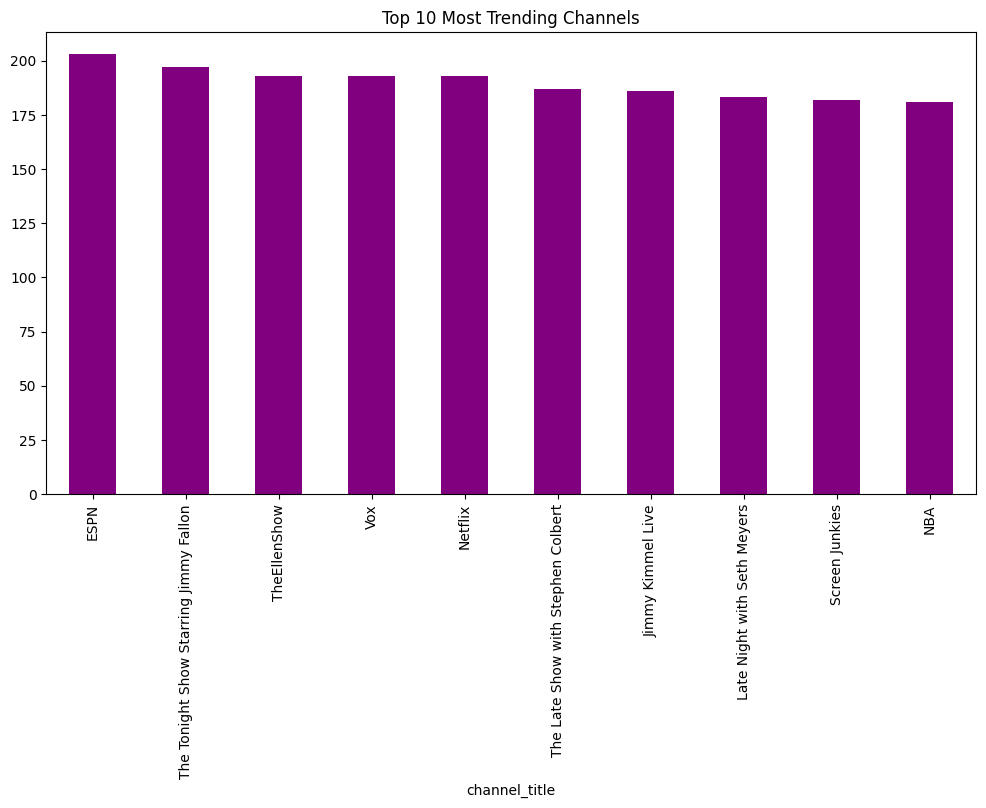

In [12]:
#BAR CHART: TOP 10 CHANNELS


plt.figure(figsize=(12,6))
df['channel_title'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Most Trending Channels")
plt.show()


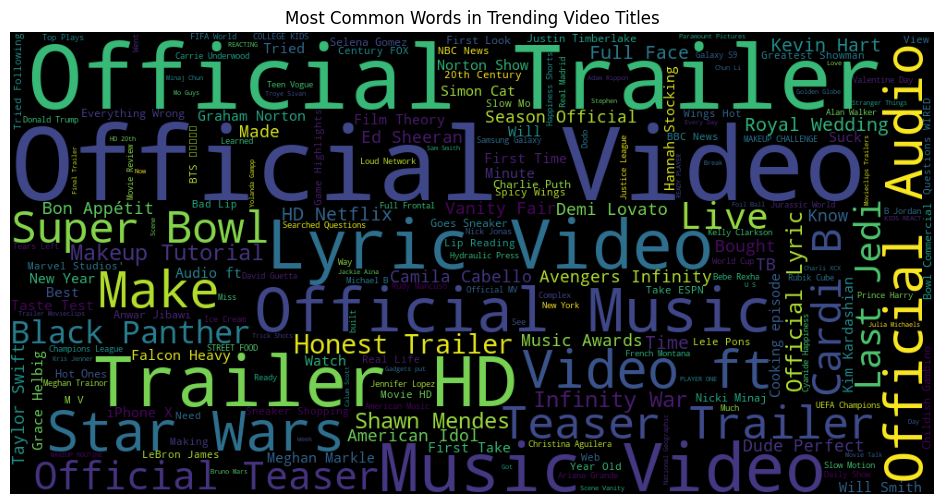

In [13]:
#8. WORKCLOUD: VIDEO TITLE

text = " ".join(df['title'])
wordcloud = WordCloud(width=1000, height=500, background_color="black").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Words in Trending Video Titles")
plt.show()



TASK4: SENTIMENT ANALYSIS

In [14]:
#CLEAN TITLE TEXT

df["clean_title"] = df["title"].str.lower()


In [15]:
#CALCULATTE SENTIMENT SCORE

df["sentiment_score"] = df["clean_title"].apply(lambda text: TextBlob(text).sentiment.polarity)


In [16]:
#CATEGORIZE SENTIMENT

def label_sentiment(score):
    if score > 0.2:
        return "Positive"
    elif score < -0.2:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment_score"].apply(label_sentiment)
df["sentiment_label"].value_counts()


sentiment_label
Neutral     30472
Positive     7451
Negative     3026
Name: count, dtype: int64

C:\Users\shaba\AppData\Local\Temp\ipykernel_14708\2984066020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment_label"], palette="Set2")


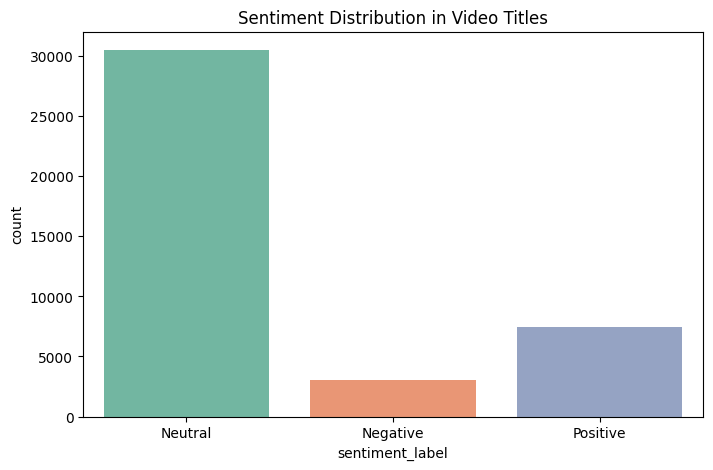

In [17]:
#SENTIMENT VISUALIZATION

plt.figure(figsize=(8,5))
sns.countplot(x=df["sentiment_label"], palette="Set2")
plt.title("Sentiment Distribution in Video Titles")
plt.show()


C:\Users\shaba\AppData\Local\Temp\ipykernel_14708\2081874631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['sentiment_label'], y=df['views'], palette="coolwarm")


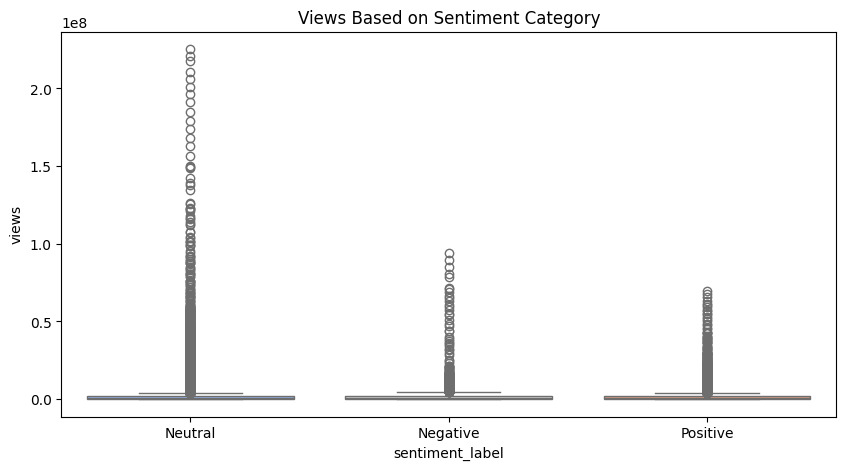

In [18]:
#REALTION BETWEEN SENTIMENT AND VIEW
plt.figure(figsize=(10,5))
sns.boxplot(x=df['sentiment_label'], y=df['views'], palette="coolwarm")
plt.title("Views Based on Sentiment Category")
plt.show()


MACHINE LEARNING MODEL to Predict Views

(Not required but improves project quality)

In [19]:
#DATA SELECTION

ml_df = df[['views','likes','dislikes','comment_count','category_id']].dropna()


In [20]:
#ENCODE CATEGORY

encoder = LabelEncoder()
ml_df['category_id'] = encoder.fit_transform(ml_df['category_id'])


In [21]:
#TRAIN/TEST SPLIT

X = ml_df.drop('views', axis=1)
y = ml_df['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
#TRAIN MODEL

model = RandomForestRegressor(n_estimators=250)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [23]:
#EVALUATE

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 1975299667268.4446
R2 Score: 0.9589771465903277


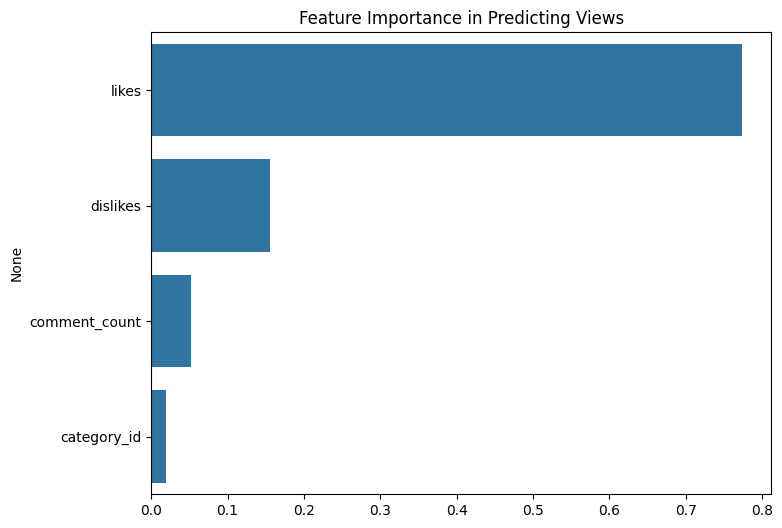

In [24]:
#FEATURE IMPORTANCE

plt.figure(figsize=(8,6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance in Predicting Views")
plt.show()
